In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
encoded_data =pd.read_csv('C:/Users/A4647/OneDrive - Axtria/Desktop/Datadrift/Datadrift_POC_with_health_data/artifact/data/meta_data(data_cleaned).csv',)

In [3]:
encoded_data

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results,Age_group,days in Hospital,bill_group
0,0,0,0,0,0,0,0,0,14,0
1,1,1,1,1,1,1,1,1,14,0
2,1,2,2,0,1,1,1,0,30,0
3,1,2,1,0,2,2,2,0,1,1
4,1,0,3,1,2,3,1,0,24,1
...,...,...,...,...,...,...,...,...,...,...
9995,1,4,2,1,0,4,2,0,4,0
9996,0,3,3,4,1,4,1,0,23,2
9997,1,2,3,4,0,4,1,0,14,0
9998,1,4,3,1,2,2,1,0,20,1


In [4]:
x = encoded_data.drop('Test Results',1)
y = encoded_data['Test Results']

In [5]:
num = ['days in Hospital']

In [6]:
ss = StandardScaler()

In [7]:
x[num] = ss.fit_transform(x[num])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [9]:
rf = RandomForestClassifier()

In [30]:
rf_model = rf.fit(x_train,y_train)

In [31]:
y_test_pred = rf_model.predict(x_test)
y_train_pred = rf_model.predict(x_train)
y_test_prob_1 = rf_model.predict_proba(x_test)[:,1]

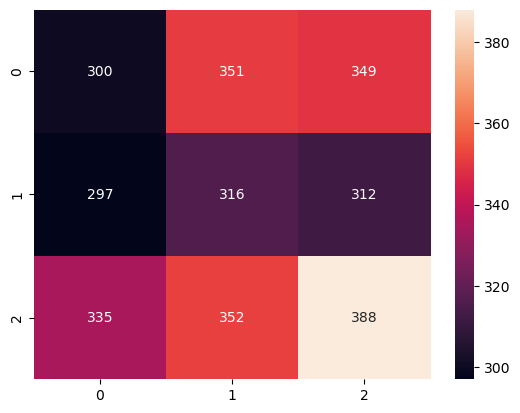

In [32]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [33]:
print(classification_report(y_test.astype(float),y_test_pred))

              precision    recall  f1-score   support

         0.0       0.32      0.30      0.31      1000
         1.0       0.31      0.34      0.33       925
         2.0       0.37      0.36      0.37      1075

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.34      0.33      0.33      3000



In [34]:
print(classification_report(y_train.astype(float),y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2277
         1.0       1.00      1.00      1.00      2342
         2.0       1.00      1.00      1.00      2381

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [35]:
rf_accuracy_score = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",rf_accuracy_score)

Train accuracy =  0.9985714285714286


In [36]:
k = KFold(n_splits = 5, shuffle = True, random_state = 48)
scores = cross_val_score(rf,x,y,cv=k,scoring = 'f1_weighted')
dt_bias = 1-np.mean(scores)
dt_var = np.std(scores)/np.mean(scores)
print('Scores:',scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

Scores: [0.3211195  0.33213117 0.33913825 0.33578455 0.33755101]
Bias error: 0.6668551024761987
Variance error: 0.019357554119951322


In [37]:
#param_grid = {
#    'bootstrap': [True, False],
#    'max_depth': [80, 90, 100, 110, 120, 130, 140],
#    'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
#    'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
#    'min_samples_split': [8, 10, 12, 14, 16, 18],
#    'n_estimators': [50 ,100, 200, 300, 1000, 400],
#    'criterion' : ["gini", "entropy", "log_loss"],
#    'n_jobs' : [-1,0,1,2,3,4],
#    'verbose' : [0,1,2,3,4,5,10],
#    'cv' : [1,2,3,4,5],
#    'random_state' : [1,2,3,4,5,6]
#}
#rf = RandomForestClassifier()
#rf = GridSearchCV(estimator = rf, param_grid = param_grid)

In [68]:
#param_grid = {
#    'bootstrap': [True, False],
#    'max_depth': np.arange(2,15),
#    'max_features': np.arange(1,6),
#    'min_samples_leaf': [3, 4],
#    'min_samples_split': [8, 10],
#    'n_estimators': np.arange(2,15),
#    'criterion' : ["gini", "entropy", "log_loss"],
#    'n_jobs' : [0,1,2],
#    'verbose' : [0,1,2,],
#    'random_state' : [1,2]
#}
param_grid = {'n_estimators':[4,5,6,7,8],'criterion':['gini','entropy','log_loss'],
          'max_depth':np.arange(2,15),'min_samples_split':[2, 5, 8, 10], 'random_state' : [1,2]}
rf = RandomForestClassifier()
rf = GridSearchCV(estimator = rf, param_grid = param_grid)

In [69]:
rf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [4, 5, 6, 7, 8],
                         'random_state': [1, 2]})

In [70]:
best = rf.best_params_
best

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_split': 2,
 'n_estimators': 8,
 'random_state': 1}

In [71]:
rf = RandomForestClassifier(**best)

In [72]:
rf_model = rf.fit(x_train,y_train)
y_test_pred = rf_model.predict(x_test)
y_train_pred = rf_model.predict(x_train)

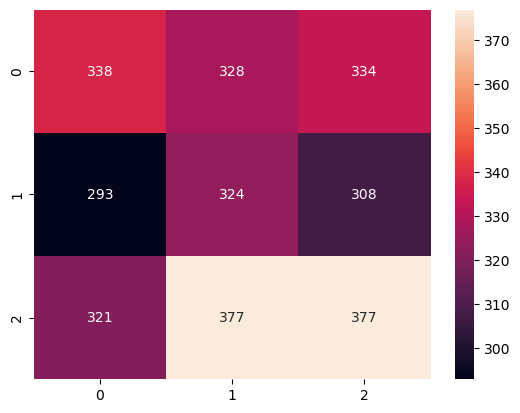

In [73]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [74]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.36      0.34      0.35      1000
           1       0.31      0.35      0.33       925
           2       0.37      0.35      0.36      1075

    accuracy                           0.35      3000
   macro avg       0.35      0.35      0.35      3000
weighted avg       0.35      0.35      0.35      3000



In [75]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2277
           1       0.88      0.89      0.89      2342
           2       0.88      0.88      0.88      2381

    accuracy                           0.88      7000
   macro avg       0.88      0.88      0.88      7000
weighted avg       0.88      0.88      0.88      7000



In [76]:
rf_accuracy_score = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",rf_accuracy_score)

Train accuracy =  0.884


In [77]:
k = KFold(n_splits = 5, shuffle = True, random_state = 48)
scores = cross_val_score(rf,x,y,cv=k,scoring = 'f1_weighted')
dt_bias = 1-np.mean(scores)
dt_var = np.std(scores)/np.mean(scores)
print('Scores:',scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

Scores: [0.32233361 0.32330393 0.32354261 0.33014092 0.33511598]
Bias error: 0.6731125925164262
Variance error: 0.01517667546593406
